In [1]:
# Criando um agente
# Entendendo a estrutura do Markdown
# Instalação das bibliotecas necessárias
%pip install pydantic-ai-slim[tavily]
%pip install docling
%pip install fastembed
%pip install qdrant-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.4/144.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.3/164.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 1.8 MB/s eta 0:00:00
   ━━━━

In [2]:
# Importa credencial salva no Google Colab
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

In [3]:
# Define a variável de ambiente para uso da API Gemini
import os
os.environ['GEMINI_API_KEY'] = GEMINI_API_KEY

In [4]:
# Importa e inicializa o agente do Pydantic AI
from pydantic_ai import Agent
import nest_asyncio
nest_asyncio.apply()

In [5]:
# Cria um agente que gera apresentações no formato Quarto (revealjs)
agent = Agent(
    'google-gla:gemini-2.0-flash',
    system_prompt='''Você é um criador de apresentações que cria apresentações neste formato:
    ---
title: "Habits"
author: "John Doe"
format: revealjs
---

## Getting up

- Turn off alarm
- Get out of bed

## Going to sleep

- Get in bed
- Count sheep

Ao receber um tema crie a apresentação.
    ''',
)

In [6]:
# Executa o agente pedindo uma apresentação sobre indústria de petshops
result = agent.run_sync('Indústria de petshops')
print(result.output)

Ok, aqui está uma apresentação sobre a indústria de petshops:

```
---
title: "A Indústria de Petshops"
author: "GPT-3"
format: revealjs
---

## Panorama Geral

- Crescimento constante do mercado pet
- Fatores impulsionadores: humanização dos pets, aumento da renda disponível, etc.
- Segmentos principais: alimentos, acessórios, serviços (veterinários, estética, etc.)

## Tendências Atuais

- E-commerce e vendas online
- Produtos premium e naturais
- Serviços personalizados e de bem-estar animal
- Tecnologia a favor dos pets (rastreadores, alimentadores automáticos, etc.)

## Desafios

- Concorrência acirrada
- Margens de lucro pressionadas
- Necessidade de inovação constante
- Regulação e bem-estar animal

## Oportunidades

- Expansão para novos mercados (produtos específicos, nichos)
- Fortalecimento da marca e fidelização de clientes
- Investimento em tecnologia e experiência do cliente
- Parcerias estratégicas (veterinários, ONGs, etc.)

## Conclusão

- Setor em constante evolução, 

In [7]:
# Formatando resultados
# Criação de um modelo de dados com Pydantic
from pydantic import BaseModel
import yaml  # Biblioteca para manipulação de YAML

In [8]:
# Define os campos que a formatação de apresentação deve ter
class Formatacao(BaseModel):
    title: str
    author: str
    format: str
    theme: str
    incremental: bool

In [9]:
# Agente que gera formatação no estilo Quarto com revealjs
agente_formatador = Agent(
    'google-gla:gemini-2.0-flash',
    system_prompt='''Você é um criador de apresentações que retorna a formatação para apresentação.
    A formatação tem o seguinte formato:
---
title: "Presentation"
author: "John Doe"
format:
  revealjs:
    theme: dark
    incremental: true
---

As opções de tema são:
beige, blood, dark, default, league, moon, night,
serif, simple, sky, solarized

Você deve inferir quais as propriedades da formatação a partir do prompt.
''',
    output_type=Formatacao
)

In [10]:
# Exemplo de execução do agente formatador
result = agente_formatador.run_sync(
    'Quero uma apresentação com o tema escuro, o autor é a Gatito Petshop, e o título é Ganhos em vendas de arranhadores.'
)
print(result.output)

title='Ganhos em vendas de arranhadores' author='Gatito Petshop' format='revealjs' theme='dark' incremental=True


In [11]:
# Converte os dados do resultado para dicionário
result.output.model_dump()

{'title': 'Ganhos em vendas de arranhadores',
 'author': 'Gatito Petshop',
 'format': 'revealjs',
 'theme': 'dark',
 'incremental': True}

In [12]:
# Função para formatar resultado em YAML
def formatar_para_yaml(result_data):
    """
    Formata os dados de result.data no formato YAML esperado.
    """
    yaml_data = {
        "title": result_data.title,
        "author": result_data.author,
        "format": {
            result_data.format: {
                "theme": result_data.theme,
                "incremental": result_data.incremental,
            }
        },
    }
    return yaml.dump(yaml_data, sort_keys=False, default_flow_style=False)

In [13]:
# Formata para YAML e imprime
yaml_formatado = formatar_para_yaml(result.output)
print(yaml_formatado)

title: Ganhos em vendas de arranhadores
author: Gatito Petshop
format:
  revealjs:
    theme: dark
    incremental: true



In [14]:
# Avaliando resultados
from pydantic_ai import ModelRetry

In [ ]:
# Validador que força o modelo a corrigir títulos genéricos
@agente_formatador.result_validator
async def valida_resultado(result):
    if result.title == 'Presentation':
        raise ModelRetry(
            '''Você precisa passar um título que tenha relação com gatos e a apresentação de resultados semestrais da Gatito Petshop.'''
        )
    else:
        return result

In [ ]:
# Teste da validação
result = agente_formatador.run_sync('Quero uma apresentação com o tema escuro, o autor é a Gatito Petshop.')
print(result.output)

In [ ]:
# Converte para YAML novamente
yaml_formatado = formatar_para_yaml(result.data)
print(yaml_formatado)

In [16]:
# Aplicando Agentic RAG
# Carregando documentos
from docling.document_converter import DocumentConverter

In [17]:
# Converte um PDF de relatório
url = 'https://raw.githubusercontent.com/allanspadini/curso-pydanticai/main/dados/Relatrio_Mensal_-_Gatito_Petshop.pdf'
converter = DocumentConverter()
result = converter.convert(url)
print(result.document.export_to_markdown())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Relatório Mensal - Gatito Petshop

Período: Março/2025

## 1. Resumo Executivo

Em março de 2025, a Gatito Petshop registrou um faturamento total de R$ 127.845,00, representando um crescimento de 8,3% em relação ao mesmo período do ano anterior. A categoria de rações continua sendo nosso principal segmento de vendas 62% do faturamento), seguida pelos acessórios como arranhadores 15% e brinquedos 12%. O ticket médio foi de R$ 98,35, com um aumento de 3,7% em relação ao mês anterior.

## 2. Análise de Vendas por Categoria

## 2.1 Rações

Faturamento total: R$ 79.263,90

| Tipo de Ração   |   Unidades Vendidas | Faturamento R$   | %do Total   | Variação Mensal   |
|-----------------|---------------------|--------------------|-------------|-------------------|
| Premium Seca    |                 683 | 38.248,00          | 48,3%       | 5,2%             |
| Super Premium   |                 312 | 26.520,00          | 33,5%       | 7,8%             |
| Úmida           |          

In [18]:
# Converte um CSV de comportamento dos gatos
url_csv = 'https://raw.githubusercontent.com/allanspadini/curso-pydanticai/refs/heads/main/dados/comportamento_gatos_produtos.csv'
result_csv = converter.convert(url_csv)
print(result_csv.document.export_to_markdown())

| Produto                   | Reação Mais Comum do Gato     |   Nota Média do Tutor (1 a 5) |   Chance de Recompra (%) | Comentários Frequentes     |
|---------------------------|-------------------------------|-------------------------------|--------------------------|----------------------------|
| Ração Premium Seca        | Come tudo em minutos          |                           4.8 |                       85 | Gato adorou e pede mais    |
| Ração Super Premium       | Cheira e come devagar         |                           4.6 |                       78 | Muito boa, mas cara        |
| Brinquedo Interativo      | Brinca por 20 minutos direto  |                           4.9 |                       92 | Diversão garantida         |
| Brinquedo com Catnip      | Rola no chão e mia            |                           4.7 |                       88 | Impressionado com a reação |
| Arranhador Torre Luxo     | Sobe e arranha por horas      |                           4.5 |       

In [19]:
# Gerando embeddings
from fastembed import TextEmbedding

In [20]:
# Divide o documento PDF em chunks menores
texto = result.document.export_to_markdown()
tamanho_pagina = 1800
chunks = {}
for i in range(0, len(texto), tamanho_pagina):
    chave = f"page_{(i // tamanho_pagina) + 1}"
    chunks[chave] = texto[i:i + tamanho_pagina].strip()

In [21]:
# Exibe parte dos chunks
for k, v in chunks.items():
    print(f"\n== {k} ==\n{v[:200]}...\n")


== page_1 ==
## Relatório Mensal - Gatito Petshop

Período: Março/2025

## 1. Resumo Executivo

Em março de 2025, a Gatito Petshop registrou um faturamento total de R$ 127.845,00, representando um crescimento de 8...


== page_2 ==
-------------|---------------------|--------------------|-------------|-------------------|
| Torre Luxo      |                  18 | 7.290,00           | 38,0%       | 12,5%            |
| Parede Co...


== page_3 ==
Previsão de Reposição   |
|----------------------|--------------------|-------------------------|---------------|-------------------------|
| Rações Premium       |                420 | 23.520,00     ...


== page_4 ==
cupom "GATITO10" foi utilizado em 87 compras online
- A amostra grátis de ração úmida na compra de ração seca converteu 35% para compra do produto completo

## 6. Vendas Online vs. Loja Física

| Cana...


== page_5 ==
Concorrência

| Concorrente    | Participação de Mercado   | Variação   | Principais Diferenciais             

In [22]:
# Concatena PDF e CSV para embeddings
document = list(chunks.values()) + [result_csv.document.export_to_markdown()]

In [23]:
# Cria embeddings com FastEmbed
embedding_model = TextEmbedding()
embeddings_generator = embedding_model.embed(document)
embeddings_list = list(embeddings_generator)

In [24]:
# Buscando em base vetorial
from qdrant_client import QdrantClient, models

In [25]:
# Cria cliente do Qdrant (persistência local em qdrant_db)
client = QdrantClient(path="qdrant_db")

In [26]:
# Prepara metadados e pontos vetoriais para inserir no Qdrant
texto_csv = result_csv.document.export_to_markdown()
metadata = [{"source": chunks[f'page_{i+1}']} for i in range(7)]
metadata.append({"source": texto_csv})
ids = list(range(8))

points = [
    models.PointStruct(id=id, vector=vector, payload=payload)
    for id, (vector, payload) in zip(ids, zip(embeddings_list, metadata))
]

In [27]:
# Cria coleção no Qdrant
client.create_collection(
    collection_name="relatórios",
    vectors_config={"size": 384, "distance": "Cosine"}
)

True

In [28]:
# Insere pontos no Qdrant
client.upsert(collection_name="relatórios", wait=True, points=points)

UpdateResult(operation_id=0, status=<UpdateStatus.COMPLETED: 'completed'>)

In [30]:
# Exemplo de consulta vetorial
query_embedding = embedding_model.embed("Qual a reação Mais Comum do Gato?")
query_embedding = list(query_embedding)

search_result = client.query_points(
    collection_name="relatórios",
    query=query_embedding[0],
    limit=1,
)
print(search_result)
print()
print(search_result.points[0].payload['source'])

points=[ScoredPoint(id=7, version=0, score=0.7522109885772248, payload={'source': '| Produto                   | Reação Mais Comum do Gato     |   Nota Média do Tutor (1 a 5) |   Chance de Recompra (%) | Comentários Frequentes     |\n|---------------------------|-------------------------------|-------------------------------|--------------------------|----------------------------|\n| Ração Premium Seca        | Come tudo em minutos          |                           4.8 |                       85 | Gato adorou e pede mais    |\n| Ração Super Premium       | Cheira e come devagar         |                           4.6 |                       78 | Muito boa, mas cara        |\n| Brinquedo Interativo      | Brinca por 20 minutos direto  |                           4.9 |                       92 | Diversão garantida         |\n| Brinquedo com Catnip      | Rola no chão e mia            |                           4.7 |                       88 | Impressionado com a reação |\n| Arranhado

In [31]:
# Criando ferramentas
from pydantic_ai.models.gemini import GeminiModel

In [32]:
# Modelo Gemini para criação de roteiros
modelo = GeminiModel('gemini-2.0-flash', provider='google-gla')

/tmp/ipython-input-4215299679.py:2: DeprecationWarning: Use `GoogleModel` instead. See <https://ai.pydantic.dev/models/google/> for more details.
  modelo = GeminiModel('gemini-2.0-flash', provider='google-gla')


In [33]:
# Agente roteirista que gera slides com notas
agente_roteirista = Agent(
    model=modelo,
    system_prompt='''Você é um criador de apresentações que retorna o roteiro de um slide...
    '''
)

In [34]:
# Perguntas que serão respondidas nos slides
perguntas = [
    "Qual o resumo executivo do relatório?",
    "Qual o faturamento com rações na vendas por categoria?",
    "Qual o faturamento com arranhadores na vendas por categoria?",
    "Qual o faturamento com brinquedos na vendas por categoria?",
    "Quais produtos de previsão de reposição urgente na análise de estoque?",
    "Como está o desempenho das vendas online comparado à loja física?",
    "Quais são os diferenciais competitivos frente à concorrência?",
    "Quais ações de RH impactaram o desempenho das equipes?",
    "Os indicadores financeiros estão alinhados com as metas?",
    "Quais tendências de consumo devem ser exploradas nos próximos meses?",
    "Qual a reação mais comum do Gato?"
]

In [36]:
# Função ferramenta para buscar dados no Qdrant
@agente_roteirista.tool_plain(docstring_format='google', require_parameter_descriptions=True,retries=2)
def consulta(pergunta: str):

    query_embedding = embedding_model.embed(pergunta)
    query_embedding = list(query_embedding)

    client = QdrantClient(path="qdrant_db")
    search_result = client.query_points(
        collection_name="relatórios",
        query=query_embedding[0],
        limit=1,
    )
    return search_result.points[0].payload['source']


In [37]:
# Reinicialização do Qdrant em pasta temporária
client = QdrantClient(path="qdrant_db_temp")

In [40]:
consulta("Arranhadores de parede estão em nível crítico")

'Previsão de Reposição   |\n|----------------------|--------------------|-------------------------|---------------|-------------------------|\n| Rações Premium       |                420 | 23.520,00               | 1,63          | 10/04/2025              |\n| Rações Super Premium |                185 | 15.725,00               | 1,69          | 08/04/2025              |\n| Rações Úmidas        |                380 | 9.500,00                | 1,09          | 15/04/2025              |\n| Rações Medicinais    |                 65 | 6.370,00                | 0,65          | 30/04/2025              |\n| Arranhadores Torre   |                 12 | 4.860,00                | 1,50          | 12/04/2025              |\n| Arranhadores Parede  |                  8 | 1.440,00                | 4,00          | URGENTE                 |\n| Arranhadores Tapete  |                 45 | 2.700,00                | 1,29          | 18/04/2025              |\n| Outros Arranhadores  |                 32 | 2.560,

In [41]:
perguntas[0]

'Qual o resumo executivo do relatório?'

In [42]:
result = agente_roteirista.run_sync(perguntas[0])

In [43]:
print(result.output)

Aqui está o possível roteiro do slide com base no resumo executivo:

**Título do Slide:** Resumo Executivo - Desempenho de Março

*   **Título:** Resumo Executivo
*   **Destaques:**
    *   Faturamento total de R$ 127.845,00, crescimento de 8,3% em relação ao ano anterior.
    *   Rações lideram com 62% do faturamento, seguidas por acessórios (arranhadores e brinquedos).
    *   Ticket médio de R$ 98,35, aumento de 3,7% em relação ao mês anterior.
*   **Análise de Vendas por Categoria:**
    *   Rações: R$ 79.263,90 (detalhar Premium Seca, Super Premium, Úmida e Medicinal).
    *   Arranhadores: R$ 19.176,75
*   **Observação:** Linha de rações naturais sem grãos apresentou crescimento de 15%.


In [45]:
# Processamento de perguntas -> roteiros
# Inicializa uma string para acumular todo o roteiro

import time
roteiro_completo = ""

# Itera sobre cada pergunta, gerando o roteiro correspondente
for pergunta in perguntas:
    time.sleep(10)  # Pausa entre cada consulta para evitar sobrecarga de requisições
    resultado = agente_roteirista.run_sync(pergunta)  # Gera roteiro do slide
    roteiro_completo += resultado.output + "\n\n"      # Concatena os resultados com espaçamento

In [46]:
print(roteiro_completo)

Aqui está um possível roteiro de slide com base no resumo executivo do relatório:

**Título do slide:** Resumo Executivo - Março 2025

*   **Ponto principal 1:** Faturamento total de R$ 127.845,00, um aumento de 8,3% em relação ao ano anterior.
*   **Ponto principal 2:** Ração continua sendo o principal segmento de vendas (62%), seguido por acessórios como arranhadores (15%) e brinquedos (12%).
*   **Ponto principal 3:** O ticket médio aumentou 3,7% em relação ao mês anterior, atingindo R$ 98,35.

**Notas:** Este slide oferece uma visão geral do desempenho da Gatito Petshop em março de 2025. Os pontos principais destacam o crescimento do faturamento, os principais contribuintes para as vendas e o aumento do ticket médio.

## Slide: Faturamento de Ração por Categoria

**Título:** Faturamento de Ração por Categoria

**Conteúdo:**

*   **Rações Premium:** R$ 23.520,00
*   **Rações Super Premium:** R$ 15.725,00
*   **Rações Úmidas:** R$ 9.500,00
*   **Rações Medicinais:** R$ 6.370,00

**Ob

In [47]:
# Uso do Tavily (busca externa)
from pydantic_ai.common_tools.tavily import tavily_search_tool
tavily = userdata.get('TAVILY_API_KEY')

def funcao_buscadora():
    agente_buscador = Agent(
        model=modelo,
        tools=[tavily_search_tool(tavily)],
        system_prompt='''Você deve buscar na internet pela query e retornar uma explicação dos resultados.
        Seja sucinto na resposta, respondendo em no máximo 2 parágrafos usando texto corrido. O conteúdo da resposta deve seguir o formato:

        ## Título

        ::: {.notes }

        Resposta

        :::


    '''
    )
    result = agente_buscador.run_sync('Quais as principais fornecedores de arranhadores na internet?')
    return result

resultado = funcao_buscadora()
print(resultado.output)

## Melhores Fornecedores de Arranhadores para Gatos Online

::: {.notes}

A busca retornou alguns dos principais sites que vendem arranhadores para gatos online. Entre eles, destacam-se Cobasi, Tiendanimal e Kiwoko, que oferecem uma variedade de modelos, tamanhos e materiais, como cartão, madeira e sisal. Além desses, a Zooplus também é mencionada como uma opção popular. A Gato Moderno, uma marca brasileira especializada em produtos para gatos com design diferenciado, também foi indicada.

:::



In [48]:
# Geração de imagens
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO

client = genai.Client(api_key=GEMINI_API_KEY)

In [49]:
# Prompt de geração de imagem
contents = ('Hi, can you create a 3d rendered image of a cat '
            'with wings and a top hat flying over a happy '
            'futuristic scifi city with lots of greenery?')

response = client.models.generate_content(
    model="gemini-2.0-flash-exp-image-generation",
    contents=contents,
    config=types.GenerateContentConfig(response_modalities=['Text', 'Image'])
)

In [50]:
# Salva a imagem gerada
for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(part.text)
  elif part.inline_data is not None:
    image = Image.open(BytesIO((part.inline_data.data)))
    image.save('gemini-native-image.png')

I will create a 3D rendering of a whimsical scene featuring a cat with feathery wings perched jauntily on its back, wearing a dapper grey top hat. This flying feline will soar above a bright and cheerful futuristic city, where sleek, modern buildings are interspersed with abundant green spaces, parks, and trees, suggesting a harmonious blend of technology and nature. The overall atmosphere will be optimistic and playful.



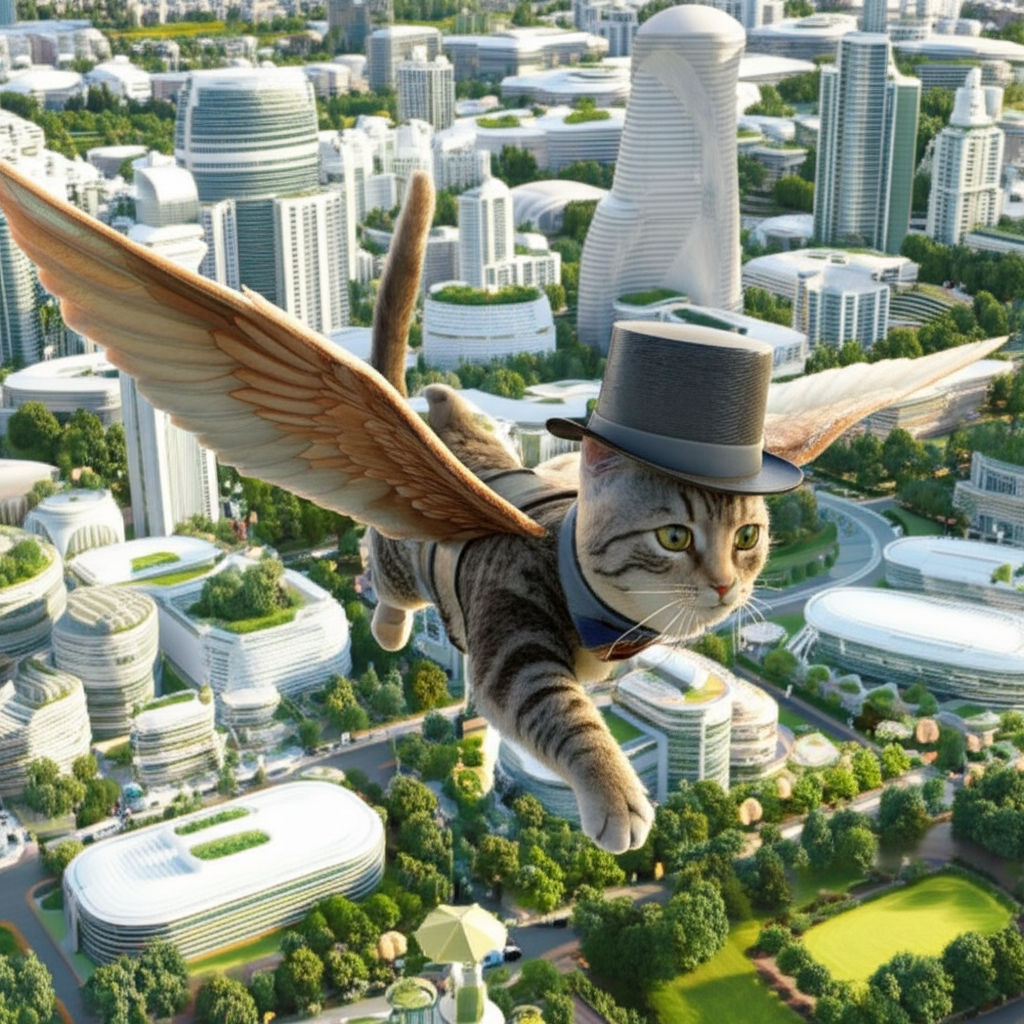

In [51]:
from IPython.display import display
display(image)

In [52]:
from typing import Literal

In [53]:
#@agente_orquestrador.tool_plain(docstring_format='google', require_parameter_descriptions=True,retries=5)
def gera_imagem(descricao: str, n_slide: str) -> str:
    """Gera uma imagem com base na descrição fornecida.

    Args:
        descricao (str): A descrição ou prompt que será usado para gerar a imagem.
        n_slide (str): O número do slide onde a imagem será inserida.

    Returns:
        Image_path: O caminho onde a imagem foi salva

    Exemplo:
        >>> consulta("Gere uma imagem de um gato em ambiente de escritório")
        "slide1.png"
    """
    response = client.models.generate_content(
      model="gemini-2.0-flash-exp-image-generation",
      contents=descricao,
      config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
      )
    )
    for part in response.candidates[0].content.parts:
      if part.text is not None:
        print(part.text)
      elif part.inline_data is not None:
        image = Image.open(BytesIO((part.inline_data.data)))
        image.save(n_slide+'.png')
    Image_path = n_slide+'.png'
    return Image_path

In [54]:
# Orquestração de múltiplos agentes
# Agente designer que transforma roteiro em slides completos com imagens
#@agente_orquestrador.tool_plain(docstring_format='google', require_parameter_descriptions=True,retries=5)
def funcao_agente_designer(conteudo):

      agente_designer = Agent(
          model=modelo,
          system_prompt=f'''
      Você é um criador de apresentações que recebe o roteiro: {conteudo}.
      Seu trabalho é transformar esse roteiro em uma apresentação no estilo Quarto usando markdown.

      Cada slide começa com ## Título do Slide.
      Você deve:
      - Adicionar até 3 bullets, imagem ou código python
      em markdown que permita a construção de um gráfico com o que é observado nas notas.
      - Você deve escolher apenas um dos três por slide, bullets, imagens ou gráficos.
      - Manter as notas com o que será falado, usando o campo `notes:`.
      - Adicionar uma imagem em alguns dos slides. A imagem deve estar no formato markdown e estar relacionada ao número do slide.
      - Retornar a **apresentação completa** com todos os slides, incluindo aqueles com imagem gerada.

      Exemplo de chamada de imagem:
      `![Descrição de um gato que deve aparecer no slide](3.png)`

      Notas devem aparecer assim:
      ::: {{.notes}}
      Texto das notas aqui
      :::

      Não diga mais nada além do markdown final.
      '''
      )
      result = agente_designer.run_sync('Complemente a apresentação')
      Resultado = result.output
      return Resultado

In [55]:
Resultado = funcao_agente_designer(roteiro_completo)

In [56]:
print(Resultado)

```markdown
## Resumo Executivo - Março 2025

*   Faturamento total de R$ 127.845,00, um aumento de 8,3% em relação ao ano anterior.
*   Ração continua sendo o principal segmento de vendas (62%), seguido por acessórios como arranhadores (15%) e brinquedos (12%).
*   O ticket médio aumentou 3,7% em relação ao mês anterior, atingindo R$ 98,35.

::: {.notes}
Este slide oferece uma visão geral do desempenho da Gatito Petshop em março de 2025. Os pontos principais destacam o crescimento do faturamento, os principais contribuintes para as vendas e o aumento do ticket médio.
:::

## Faturamento de Ração por Categoria

```python
import matplotlib.pyplot as plt

categorias = ['Premium', 'Super Premium', 'Úmidas', 'Medicinais']
faturamento = [23520, 15725, 9500, 6370]

plt.bar(categorias, faturamento, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel('Categorias de Ração')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento de Ração por Categoria')
plt.savefig('1.png')
`

In [57]:
# Agente revisor que valida e complementa a apresentação final

agente_revisor = Agent(
          model=modelo,
          system_prompt=f'''
          Você é o agente revisor de apresentação.
          Você deve verificar o texto passado via prompt e conferir se não existem informações como
          - [Preencha com os resultados da consulta]. Nesse caso você deve substituir esse conteúdo por
          um texto que faça sentido de acordo com as notas do slide em questão.

          Quando você observar a presença de uma imagem como por exemplo:
          ![Um gato brincando com um brinquedo](3.png)
          Você deve gerar o arquivo da imagem correspondente usando a ferramenta gera_imagem.

          Ao final você deve retornar o texto corrigido.

      '''
      )

In [58]:
apresentacao_final = agente_revisor.run_sync(Resultado)

In [60]:
print(apresentacao_final.output)

## Resumo Executivo - Março 2025

*   Faturamento total de R$ 127.845,00, um aumento de 8,3% em relação ao ano anterior.
*   Ração continua sendo o principal segmento de vendas (62%), seguido por acessórios como arranhadores (15%) e brinquedos (12%).
*   O ticket médio aumentou 3,7% em relação ao mês anterior, atingindo R$ 98,35.

::: {.notes}
Este slide oferece uma visão geral do desempenho da Gatito Petshop em março de 2025. Os pontos principais destacam o crescimento do faturamento, os principais contribuintes para as vendas e o aumento do ticket médio.
:::

## Faturamento de Ração por Categoria

```python
import matplotlib.pyplot as plt

categorias = ['Premium', 'Super Premium', 'Úmidas', 'Medicinais']
faturamento = [23520, 15725, 9500, 6370]

plt.bar(categorias, faturamento, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel('Categorias de Ração')
plt.ylabel('Faturamento (R$)')
plt.title('Faturamento de Ração por Categoria')
plt.savefig('1.png')
```

![Gráfic